In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In [2]:
data = pd.read_csv('spotify_ver5_all.csv')

### relase_date 改成只顯示年份

In [3]:
tem = []
for i in range(data.shape[0]):
    tem.append(data['release_date'][i].split('-')[0])
data['release_date'] = tem
data.head()

,name,id,popularity,duration_ms,release_date,artist_name,artist_id,genres,artist_followers_num,artist_popularity,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Yellow,3AJwUDP919kvQ9QcozQPxg,83,266773,2000,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,permanent wave,23551766.0,93,...,0.234,-7.227,1.0,0.0281,173.365,4.0,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,0.285
1,後來,2wzXhxWPX0aODraKNXoJYY,58,341400,2000,Rene Liu,6qzfo7jiO4OrhxrvPFPlWX,c-pop,70961.0,52,...,0.174,-8.285,1.0,0.0265,149.784,4.0,https://api.spotify.com/v1/tracks/2wzXhxWPX0aO...,audio_features,spotify:track:2wzXhxWPX0aODraKNXoJYY,0.375
2,開始懂了,68tZwwRuo9ip5gRQFG1XWF,51,271493,2000,Stefanie Sun,0SIXZXJCAhNU8sxK0qm7hn,c-pop,225232.0,62,...,0.110,-6.909,0.0,0.0290,117.933,4.0,https://api.spotify.com/v1/tracks/68tZwwRuo9ip...,audio_features,spotify:track:68tZwwRuo9ip5gRQFG1XWF,0.151
3,可愛女人,14JlPNX0Z1JM7Mwfou6Xlf,45,239026,2000,Jay Chou,2elBjNSdBE2Y3f0j1mjrql,c-pop,1355834.0,77,...,0.188,-9.985,1.0,0.0306,135.446,4.0,https://api.spotify.com/v1/tracks/14JlPNX0Z1JM...,audio_features,spotify:track:14JlPNX0Z1JM7Mwfou6Xlf,0.916
4,星晴,5ZcRLLJSbTPdKMikgdMNX9,45,259399,2000,Jay Chou,2elBjNSdBE2Y3f0j1mjrql,c-pop,1355834.0,77,...,0.224,-10.374,1.0,0.0311,88.966,4.0,https://api.spotify.com/v1/tracks/5ZcRLLJSbTPd...,audio_features,spotify:track:5ZcRLLJSbTPdKMikgdMNX9,0.240


### 移除2020年的資料(1筆)

In [4]:
# data = data[data['release_date']!='2020']

In [5]:
# data.head()


data_gb = data.groupby('release_date')
data_gb['name'].count()

release_date
2000    9781
2001    9646
2002    9498
2003    9511
2004    9242
2005    9284
2006    9319
2007    9305
2008    9404
2009    9948
2010    9598
2011    9198
2012    9349
2013    9367
2014    9438
2015    7715
2016    8966
2017    9500
2018    9696
2019    9632
Name: name, dtype: int64

### 分年度

In [6]:
def get_year_data(data , number):
    return data[data['release_date']== str(number) ]

In [7]:
data_gb = data.groupby('release_date')

In [8]:
year_Song_count = data_gb['release_date'].describe()['count']

In [9]:
years = year_Song_count.index

In [10]:
datas = {y :get_year_data(data, y) for y in years }

In [11]:

def as_feature_pop(data,popularity = 70):
    return data[data['popularity'] > popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']] 
def as_feature_unpop(data,popularity = 30):
    return data[data['popularity'] < popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']]  


In [12]:
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
data_features_up = {i : as_feature_unpop( datas[i] ,datas[i]['popularity'].describe()['25%']) for i in datas}

In [13]:
# 只是做標準化而已
from sklearn import preprocessing
def scale_mean(feature):
    return preprocessing.MinMaxScaler().fit_transform(feature).mean(axis=0)

In [14]:
def collect_data(data_features_p , data_features_up , year):
    labels= list(data_features_p[year])[:]
    stats = scale_mean(data_features_p[year]).tolist()
    stats2 = scale_mean(data_features_up[year]).tolist()
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    stats2 =np.concatenate((stats2,[stats2[0]])) 
    angles=np.concatenate((angles,[angles[0]]))
    
    return stats, stats2, angles, labels


def Myplot( stats, stats2, angles, labels, ax , year):
    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
    plt.ylim(0,1)
    ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 10)

    ax.plot(angles, stats, 'o-', linewidth=2, label = "popular")
    ax.fill(angles, stats, alpha=0.25)
    

    ax.plot(angles, stats2, 'o-', linewidth=2, label = "unpopular")
    ax.fill(angles, stats2, alpha=0.25 )
    ax.set_title( str(year)  + ' Mean Values of the audio features')
    ax.grid(True)
    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [15]:
def Get_data(data_features_p , years):
    
    
    dic_data = {i: scale_mean(data_features_p[i]).tolist() for i in years}
    dic_labels = {i: list(data_features_p[i])[:]  for i in years}
    dic_angles = {i: np.linspace(0, 2*np.pi, len(dic_labels[i]), endpoint=False) for i in years}
    for i in years:

        dic_data[i] = np.concatenate( (dic_data[i],[dic_data[i][0]]))
        dic_angles[i] = np.concatenate( (dic_angles[i] , [dic_angles[i][0]] ))
            
    return dic_data , dic_angles , dic_labels


In [16]:
def My_plot2(dic_data , dic_angles, dic_labels):
    fig=plt.figure(figsize = (30,30))
    ax = fig.add_subplot(221, polar=True)
    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="Red", size=12)
    plt.ylim(0,1)
    for i in dic_data:
        ax = fig.add_subplot(221, polar=True)
        ax.plot(dic_angles[i],dic_data[i], '-o' ,linewidth=2, label = str(i))
        ax.fill(dic_angles[i], dic_data[i], alpha=0.25)
        ax.set_thetagrids(dic_angles[i] * 180/np.pi, dic_labels[i] , fontsize = 13)
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)
    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))


In [17]:
data_features_p.keys()

dict_keys(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])

/Users/jiangsiyang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


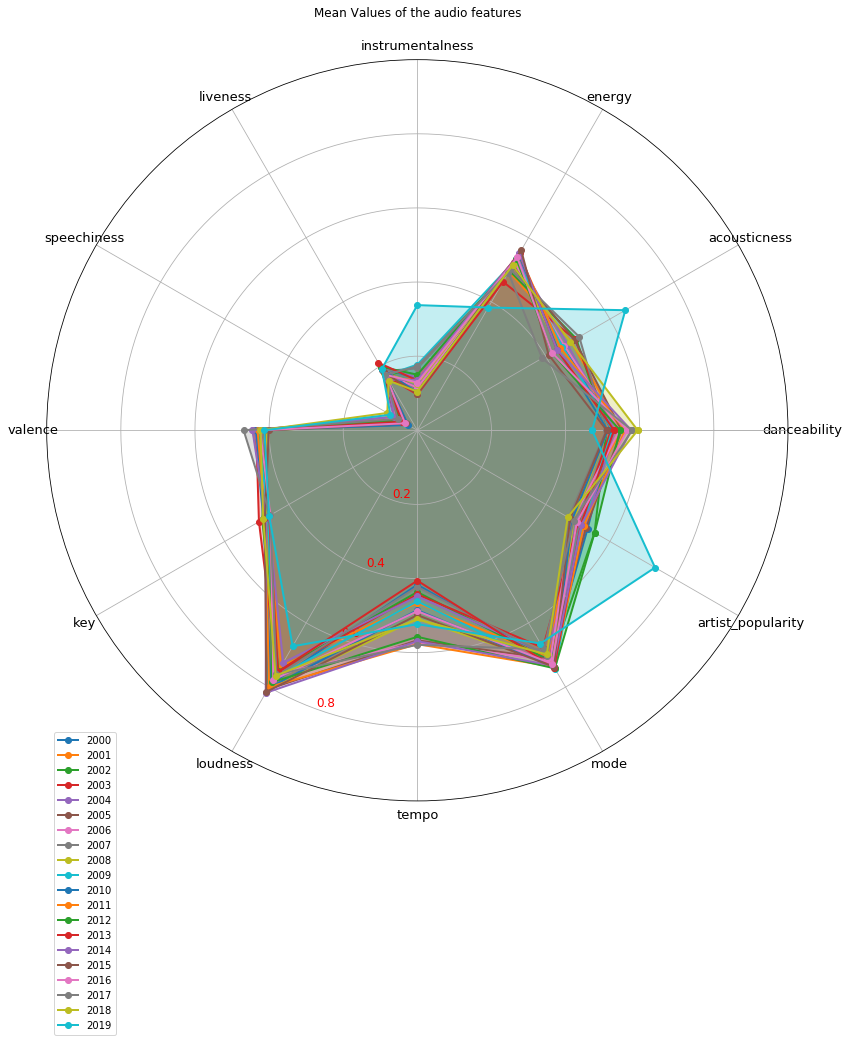

In [18]:
dic_data, angles , labels = Get_data(data_features_up , years)
My_plot2(dic_data , angles , labels)

/Users/jiangsiyang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


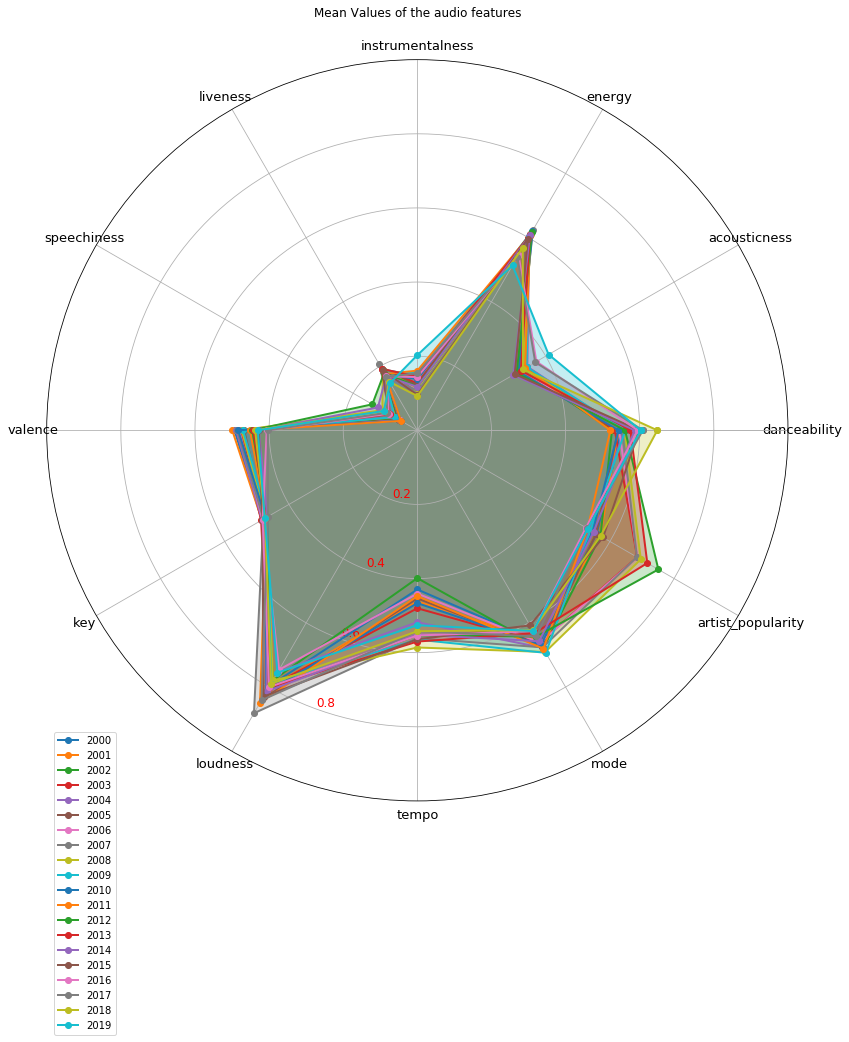

In [19]:
dic_data, angles ,labels = Get_data(data_features_p ,years)
My_plot2(dic_data , angles , labels)